## Assessment 1

In [3]:
import pandas as pd

### 1) Import pandas and read in the banklist.csv file into a dataframe called banks

In [6]:
banks = pd.read_csv(r'C:\Users\Admin\Downloads\banklist.csv')

### 2) Show the head of the dataframe.

In [7]:
print(banks.head())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
1  30003  First-Citizens Bank & Trust Company    05-May-17    26-Jul-17  
2  58302                         Whitney Bank    28-Apr-17    26-Jul-17  
3  35495                    Cache Valley Bank    03-Mar-17    18-May-17  
4  19328                  State Bank of Texas    27-Jan-17    18-May-17  


### 3) What are the column names?

In [8]:
print(banks.columns)

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')


### 4) How many States (ST) are represented in this data set?

In [9]:
num_states = banks['ST'].nunique()

print(f"Number of states represented: {num_states}")

Number of states represented: 44


### 5) Get a list or array of all the states in the data set.

In [10]:
states_list = banks['ST'].unique()

print("List of states represented in the dataset:")
print(states_list)

List of states represented in the dataset:
['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


### 6) What are the top 5 states with the most failed banks?

In [11]:
top_states = banks['ST'].value_counts().head(5)

print("Top 5 states with the most failed banks:")
print(top_states)

Top 5 states with the most failed banks:
ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


7) What are the top 5 acquiring institutions?

In [12]:
top_institutions = banks['Acquiring Institution'].value_counts().head(5)

print("Top 5 acquiring institutions:")
print(top_institutions)

Top 5 acquiring institutions:
Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


8) How many banks has the State Bank of Texas acquired? How many of them were actually in Texas?

In [13]:
state_bank_acquisitions = banks[banks['Acquiring Institution'] == 'State Bank of Texas']

total_acquired = state_bank_acquisitions.shape[0]

acquired_in_texas = state_bank_acquisitions[state_bank_acquisitions['ST'] == 'TX'].shape[0]

print(f"Total banks acquired by State Bank of Texas: {total_acquired}")
print(f"Number of banks acquired in Texas: {acquired_in_texas}")

Total banks acquired by State Bank of Texas: 3
Number of banks acquired in Texas: 1


9) What is the most common city in California for a bank to fail in?

In [15]:
california_banks = banks[banks['ST'] == 'CA']

most_common_city = california_banks['City'].mode()[0]

print(f"The most common city in California for a bank to fail is: {most_common_city}")

The most common city in California for a bank to fail is: Los Angeles


## Assessment 2:

Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

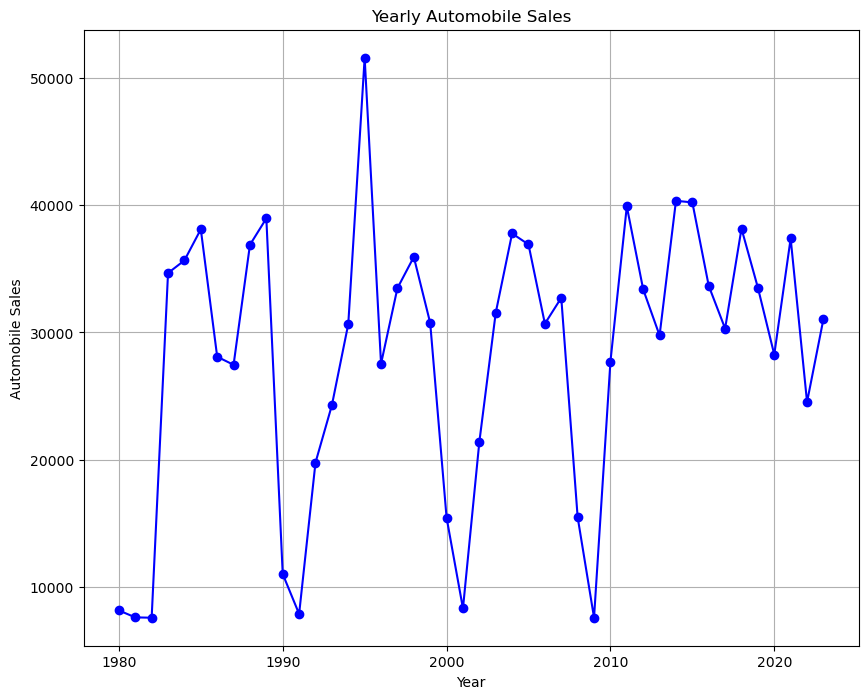

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
auto_sales_path = r'C:\Users\Admin\Downloads\historical_automobile_sales.csv'
auto_sales = pd.read_csv(auto_sales_path)

# Ensure the 'Year' and 'Automobile_Sales' columns exist and are correctly formatted
auto_sales['Year'] = pd.to_datetime(auto_sales['Year'], format='%Y')

# Group data by year and sum the sales
yearly_sales = auto_sales.groupby(auto_sales['Year'].dt.year)['Automobile_Sales'].sum()

# Plot the data
plt.figure(figsize=(10, 8))
yearly_sales.plot(kind='line', marker='o', color='b')
plt.title('Yearly Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

Text(0.5, 1.0, 'Vehicle Sales Trends by Type During Recession Periods')

<Figure size 1200x800 with 0 Axes>

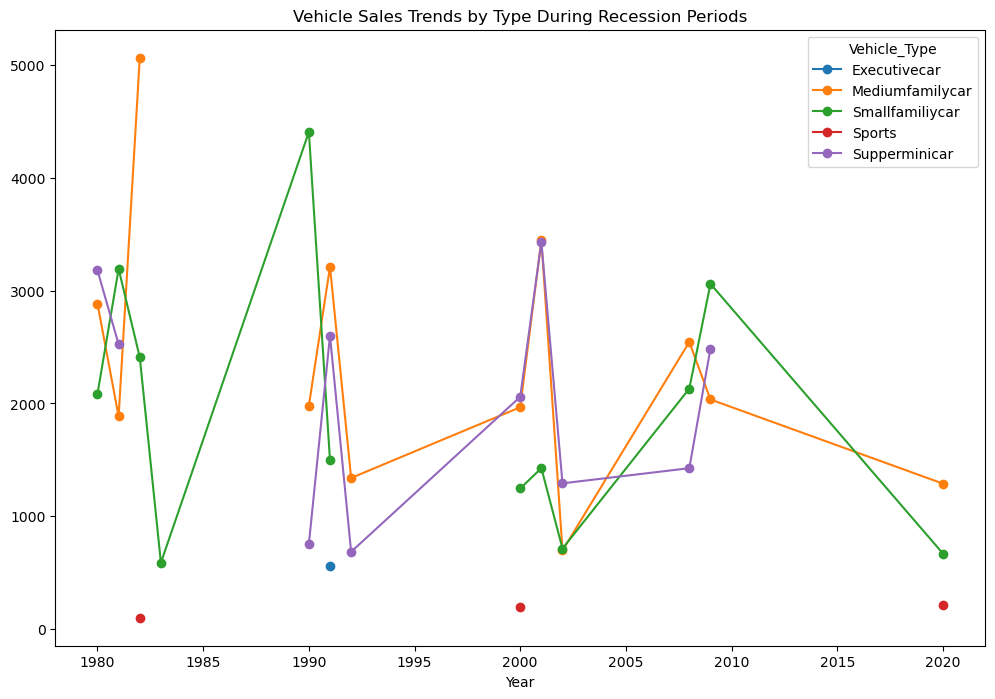

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
auto_sales_path = r'C:\Users\Admin\Downloads\historical_automobile_sales.csv'
auto_sales = pd.read_csv(auto_sales_path)

# Filter for recession periods
recession_data = auto_sales[auto_sales['Recession'] == 1]

# Group data by year and vehicle type, and sum sales
recession_trends = (
    recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales']
    .sum()
    .unstack()
)

# Plot the data
plt.figure(figsize=(12, 8))
recession_trends.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Vehicle Sales Trends by Type During Recession Periods')

Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non- recession period.

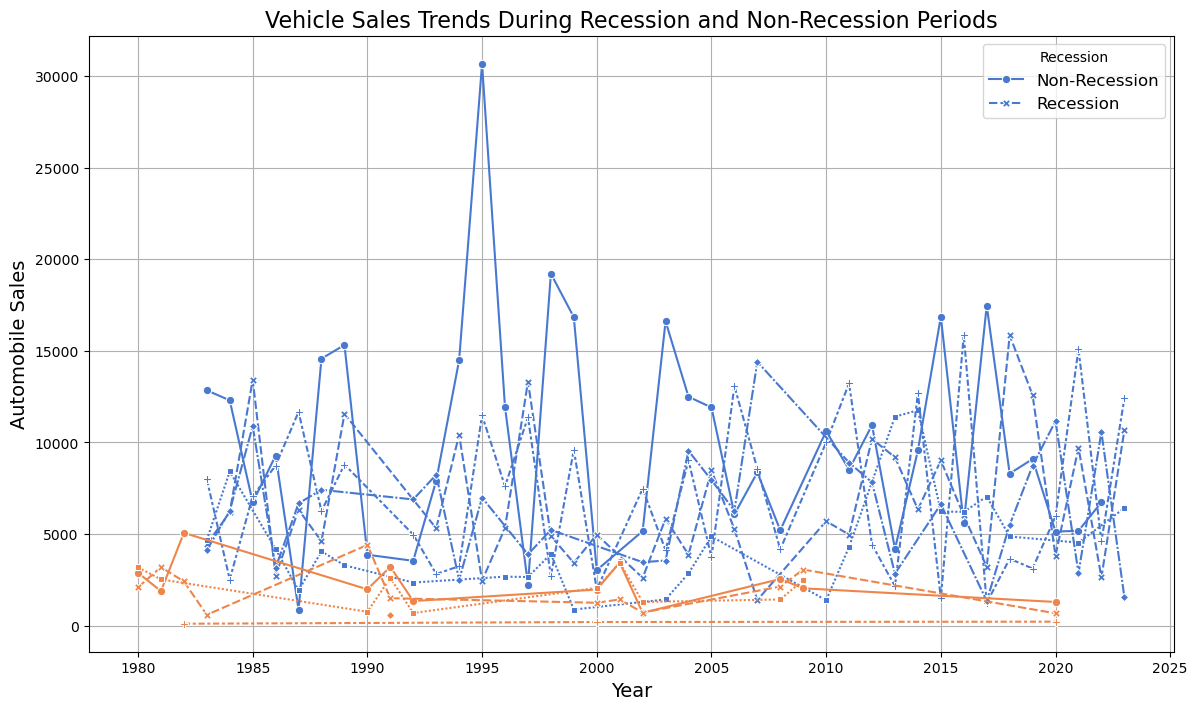

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
auto_sales_path = r'C:\Users\Admin\Downloads\historical_automobile_sales.csv'
auto_sales = pd.read_csv(auto_sales_path)

# Ensure the 'Year' column is correctly formatted for grouping
auto_sales['Year'] = pd.to_datetime(auto_sales['Year'], format='%Y')

# Prepare the data for visualization
grouped_sales = (
    auto_sales.groupby(['Year', 'Vehicle_Type', 'Recession'])['Automobile_Sales']
    .sum()
    .reset_index()
)

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=grouped_sales,
    x='Year',
    y='Automobile_Sales',
    hue='Recession',
    style='Vehicle_Type',
    markers=True,
    palette='muted',
    errorbar=None,  # Replace `ci=None` with `errorbar=None`
)

# Add titles and labels
plt.title('Vehicle Sales Trends During Recession and Non-Recession Periods', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Automobile Sales', fontsize=14)
plt.legend(title='Recession', labels=['Non-Recession', 'Recession'], fontsize=12)
plt.grid(True)
plt.show()

Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period 

Hint: To visualize sales of different vehicles during recession and non- recession periods, you can use a bar chart. You will need to group Recession, Vehicle_Typefor average Automobile_Sales and then plot it. Make use of sns. bar plot (x=x, y=data = df)) 

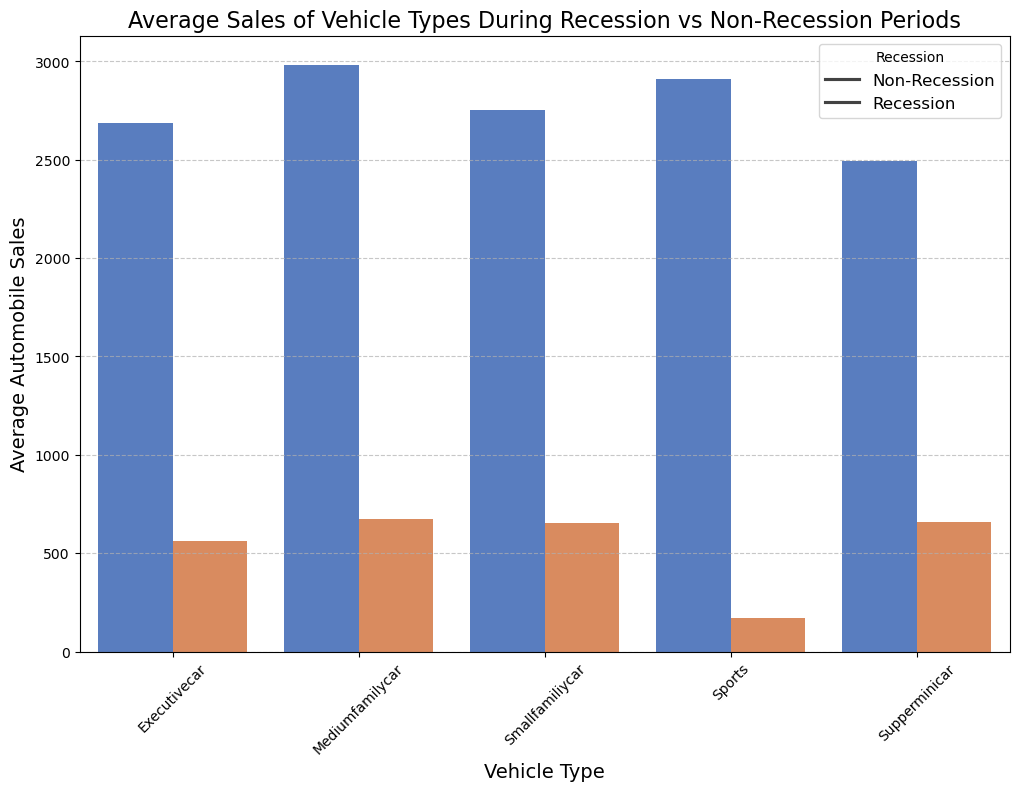

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
auto_sales_path = r'C:\Users\Admin\Downloads\historical_automobile_sales.csv'
auto_sales = pd.read_csv(auto_sales_path)

# Group by Recession and Vehicle_Type, and calculate average Automobile_Sales
avg_sales = (
    auto_sales.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales']
    .mean()
    .reset_index()
)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=avg_sales,
    x='Vehicle_Type',
    y='Automobile_Sales',
    hue='Recession',
    palette='muted'
)

# Add titles and labels
plt.title('Average Sales of Vehicle Types During Recession vs Non-Recession Periods', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Average Automobile Sales', fontsize=14)
plt.legend(title='Recession', labels=['Non-Recession', 'Recession'], fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()